In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/traindataset加金門後/00traindata_all.csv ',  index_col = 'ID')
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,人口密度,老化指數,與高鐵最短距,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,0.14,16,177,2.40,27,2.15,9126.87,166.10,4.20,0.006300
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,0.22,9,71,6.61,30,3.61,9126.87,166.10,3.53,0.006300
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,0.12,9,18,5.96,126,7.19,924.21,161.78,7.82,0.004997
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,0.19,9,52,5.19,72,4.90,1946.61,147.86,4.96,0.005074
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,0.06,33,167,1.36,73,0.99,1946.61,147.86,1.21,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,0.12,6,63,6.39,94,6.23,1868.59,101.89,12.11,0.005368
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,0.12,6,34,1.38,86,1.77,4344.33,87.03,6.96,0.006842
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,0.05,12,71,20.86,77,20.51,1946.61,147.86,14.76,0.005074


In [5]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-11-10 08:56:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.13.139, 108.177.13.100, 108.177.13.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.13.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6l4b2ttnbbv2793aopl2gls9firf56p/1699606575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=7d9f32d5-08d1-4bd8-9cda-e6c603414433 [following]
--2023-11-10 08:56:22--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6l4b2ttnbbv2793aopl2gls9firf56p/1699606575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=7d9f32d5-08d1-4bd8-9cda-e6c603414433
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to doc-0k

# * 以 Heatmap 呈現 Feature 之間的相關係數，以相關係數衡量兩變數間「線性」關聯性的高低程度，相關係數代表的意義：
= 1，X 上升時 Y 也會上升

= -1，X 上升時 Y 會下降

= 0，X 上升時，Ｙ可能上升或是下降，ＸＹ之間沒有線性關係

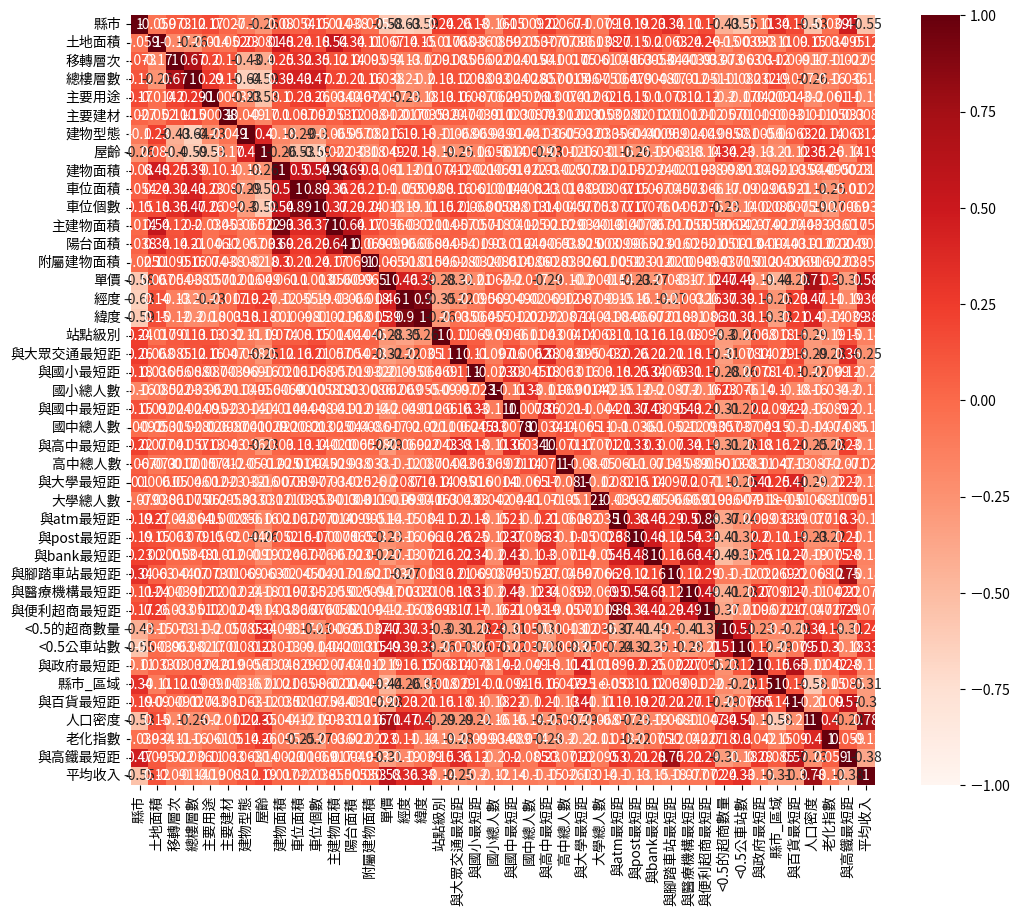

In [6]:
featuresCorr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(featuresCorr, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1)
plt.show()

In [42]:
# 找出與 Target 相關係數 >0.5 Feature
targetCorr = abs(featuresCorr['單價'])
targetCorr = targetCorr.drop('單價')
selectedFeatures = targetCorr[targetCorr>0.1]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 24 

Highly relative feature list:
縣市           0.580683
經度           0.456070
緯度           0.394313
站點級別         0.276209
與大眾交通最短距     0.322400
與國小最短距       0.206658
與國中最短距       0.200208
與高中最短距       0.287924
高中總人數        0.101608
與大學最短距       0.204057
與atm最短距      0.143283
與post最短距     0.230625
與bank最短距     0.274789
與醫療機構最短距     0.165900
與便利超商最短距     0.122501
<0.5的超商數量    0.468489
<0.5公車站數     0.485722
與政府最短距       0.186859
縣市_區域        0.443979
與百貨最短距       0.284007
人口密度         0.713742
老化指數         0.302304
與高鐵最短距       0.314430
平均收入         0.575674
Name: 單價, dtype: float64


In [43]:
# 找出與 Target 相關係數 < -0.5 的 Feature
targetCorr = abs(featuresCorr['單價'])
targetCorr = targetCorr.drop('單價')
selectedFeatures = targetCorr[targetCorr<-0.1]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 0 

Highly relative feature list:
Series([], Name: 單價, dtype: float64)


In [9]:
from numpy.ma.core import sort
# sorted與 Target 相關係數的 Feature
targetCorr = abs(featuresCorr['單價'])
targetCorr = targetCorr.drop('單價')
selectedFeatures = sorted([targetCorr])
print(selectedFeatures)

[縣市           0.580683
土地面積         0.067088
移轉層次         0.054038
總樓層數         0.037874
主要用途         0.057103
主要建材         0.011903
建物型態         0.016075
屋齡           0.049196
建物面積         0.061327
車位面積         0.099986
車位個數         0.013064
主建物面積        0.056150
陽台面積         0.009866
附屬建物面積       0.064905
經度           0.456070
緯度           0.394313
站點級別         0.276209
與大眾交通最短距     0.322400
與國小最短距       0.206658
國小總人數        0.062028
與國中最短距       0.200208
國中總人數        0.016664
與高中最短距       0.287924
高中總人數        0.101608
與大學最短距       0.204057
大學總人數        0.000158
與atm最短距      0.143283
與post最短距     0.230625
與bank最短距     0.274789
與腳踏車站最短距     0.083310
與醫療機構最短距     0.165900
與便利超商最短距     0.122501
<0.5的超商數量    0.468489
<0.5公車站數     0.485722
與政府最短距       0.186859
縣市_區域        0.443979
與百貨最短距       0.284007
人口密度         0.713742
老化指數         0.302304
與高鐵最短距       0.314430
平均收入         0.575674
Name: 單價, dtype: float64]


# Univariate feature selection 單變量特徵選取
定義：根據統計上的標準，選取 Top N 個特徵，或是前 M% 的特徵

回歸：f_regression，domual_info_regression

In [52]:
import numpy as np
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
# mutual_info_regression = MI互信息
# SelectKBest = 單變量特徵選擇

X = data.drop(['單價'], axis = 1)
y = data['單價']

# 使用f_regression进行特征选择
f_selector = SelectKBest(score_func=f_regression, k=30)
X_new_f = f_selector.fit_transform(X, y)

# 使用mutual_info_regression进行特征选择
mi_selector = SelectKBest(score_func=mutual_info_regression, k=30)
X_new_mi = mi_selector.fit_transform(X, y)

# 获取原始特征的名称
feature_names = X.columns

# 查看选择的特征
selected_features_f = f_selector.get_support()
selected_features_mi = mi_selector.get_support()

# 打印被选择的特征的名称
selected_feature_names_1 = [feature_names[i] for i, selected in enumerate(selected_features_f) if selected]
selected_feature_names_2 = [feature_names[i] for i, selected in enumerate(selected_features_mi) if selected]

print("使用f_regression选择的特征：", selected_features_f)
print(selected_feature_names_1)
print(' ')
print("使用mutual_info_regression选择的特征：", selected_features_mi)
print(selected_feature_names_2)


使用f_regression选择的特征： [ True  True False False False False False False  True  True False False
 False  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
['縣市', '土地面積', '建物面積', '車位面積', '附屬建物面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '與高中最短距', '高中總人數', '與大學最短距', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距', '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入']
 
使用mutual_info_regression选择的特征： [ True False False  True  True False False  True  True  True False  True
 False False  True  True  True  True False  True  True  True  True  True
  True  True False  True  True  True False False  True  True  True  True
  True  True  True  True  True]
['縣市', '總樓層數', '主要用途', '屋齡', '建物面積', '車位面積', '主建物面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '大學總人數', '與

# ANOVA, Analysis of variance 變異數分析
以 F-value 判斷各個特徵之間的平均數是否相近，可以用來確定哪些特徵對因變量的變化有顯著影響

In [21]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [22]:
import pandas as pd
from scipy.stats import f_oneway

In [23]:
f_scores, p_values = [], []

for feature_name in X.columns:
    groups = [X[feature_name][y == value] for value in y.unique()]
    f_statistic, p_value = f_oneway(*groups)
    f_scores.append(f_statistic)
    p_values.append(p_value)


In [24]:
for i in zip(X.columns, f_scores, p_values):
  print(i)

('縣市', 24.96747992730371, 0.0)
('土地面積', 2.457530225784168, 1.9181142706221723e-61)
('移轉層次', 1.823160530622728, 3.927161603157259e-26)
('總樓層數', 2.316160117144245, 6.575690748107892e-53)
('主要用途', 1.9237013270668908, 3.908840043434554e-31)
('主要建材', 1.5447694187719614, 5.960493636905045e-14)
('建物型態', 1.777091969848091, 6.160078552000549e-24)
('屋齡', 3.32852748876281, 4.418033158075674e-119)
('建物面積', 2.7605012802541333, 1.1941533176541466e-80)
('車位面積', 2.994940571862152, 3.417721698556899e-96)
('車位個數', 2.6762816821816453, 3.3595190185832057e-75)
('主建物面積', 2.4585713790346113, 1.6554005129325936e-61)
('陽台面積', 1.777387831731741, 5.9661141386098156e-24)
('附屬建物面積', 1.0651133973299218, 0.15102002286303903)
('經度', 12.623789629756747, 0.0)
('緯度', 11.564274857973137, 0.0)
('站點級別', 3.319923638316346, 1.7581083857656762e-118)
('與大眾交通最短距', 4.438224627290191, 3.7706021548949767e-199)
('與國小最短距', 2.089324685362979, 6.250294350242385e-40)
('國小總人數', 2.277971695113945, 1.171294102657444e-50)
('與國中最短距', 2.0902

In [25]:
selected_features = [feature for feature, p_value in zip(X.columns, p_values) if p_value < 0.05]
print("选择的特征：", selected_features)

选择的特征： ['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '主建物面積', '陽台面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '與atm最短距', '與post最短距', '與bank最短距', '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入']


In [26]:
selected_features = [feature for feature, p_value in zip(X.columns, p_values) if p_value < 0.001]
print("选择的特征：", selected_features)

选择的特征： ['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '主建物面積', '陽台面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '與atm最短距', '與post最短距', '與bank最短距', '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入']


In [27]:
print(len(selected_features))

38


# Recursive Feature Elimination, RFE 對特徵進行排名

RFE是一种递归的特征选择方法，它反复拟合模型，并通过消除对模型性能影响较小的特征来逐步减小特征集合的大小。

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [15]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [16]:
# 创建一个线性回归模型
model = LinearRegression()

# 创建RFE对象
rfe = RFE(model)

# 设置要选择的特征数量
num_features_to_select = 10
rfe.n_features_to_select = num_features_to_select

# 拟合RFE对象来进行特征排名
rfe.fit(X, y)

# 获取排名结果
feature_ranking = rfe.ranking_

# 特征名称
feature_names = X.columns

# 创建包含特征名和排名的数据框
feature_ranking_df = pd.DataFrame({'FeatureName': feature_names, 'Ranking': feature_ranking})

# 打印特征名和排名
print("特征名和排名：")
print(feature_ranking_df)

特征名和排名：
   FeatureName  Ranking
0           縣市        3
1         土地面積        9
2         移轉層次       18
3         總樓層數       11
4         主要用途       23
5         主要建材       21
6         建物型態       14
7           屋齡       15
8         建物面積        1
9         車位面積        1
10        車位個數        1
11       主建物面積        1
12        陽台面積        4
13      附屬建物面積        6
14          經度        1
15          緯度        1
16        站點級別       19
17    與大眾交通最短距        5
18      與國小最短距        2
19       國小總人數       29
20      與國中最短距       26
21       國中總人數       28
22      與高中最短距        1
23       高中總人數       31
24      與大學最短距       24
25       大學總人數       32
26     與atm最短距       16
27    與post最短距       10
28    與bank最短距        1
29    與腳踏車站最短距       17
30    與醫療機構最短距       12
31    與便利超商最短距        1
32   <0.5的超商數量        7
33    <0.5公車站數       27
34      與政府最短距       25
35       縣市_區域       22
36      與百貨最短距        8
37        人口密度       30
38        老化指數       13
39      與高鐵最短距       20
40      

# 基因演算法

In [28]:
!pip install deap

In [29]:
import csv
import random
import numpy as np
from deap import base, creator, tools, algorithms

In [30]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [31]:
# 定义遗传算法的适应度函数
def evaluate(individual):
    # individual 是一个二进制串，表示特征的选择情况
    selected_features = [feature for feature, gene in zip(X.T, individual) if gene]

    if len(selected_features) == 0:
        return 0,  # 避免未选择任何特征的情况

    # 在这里使用你的模型和评估方法来计算适应度
    # 这里使用简单的均值作为适应度，实际中需要替换成你的问题和数据集
    mean_feature_value = np.mean(selected_features)

    return mean_feature_value,

In [32]:
# 创建遗传算法工具箱
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=20)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# 创建种群
population = toolbox.population(n=100)

In [33]:
# 运行遗传算法
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.01, ngen=100, stats=None, halloffame=None, verbose=True)

# 获取最佳个体
best_individual = tools.selBest(population, 1)[0]

# 提取所选特征
selected_features = [feature_name for feature_name, gene in zip(X.columns, best_individual) if gene]

print("选择的特征名称：", selected_features)

UFuncTypeError: ignored

# 基于树的特征选择（Tree-Based Feature Selection，TbFS）

是一种通过使用决策树或随机森林等树模型来评估特征的重要性，然后选择最重要的特征的方法。

In [53]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 拟合模型
rf_model.fit(X, y)  # X 是特征矩阵，y 是目标变量


RandomForestRegressor(random_state=42)

In [64]:
# 获取特征重要性得分
feature_importances = rf_model.feature_importances_

# 选择最重要的特征
threshold = 0.01  # 设置一个重要性得分的阈值
selected_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > threshold]

# 打印所选择的特征
print("选择的特征：", selected_features)

选择的特征： ['縣市', '總樓層數', '屋齡', '建物面積', '經度', '緯度', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '與高鐵最短距']


# L1正則化

In [56]:
from sklearn.linear_model import Lasso

In [57]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [58]:
# 创建具有L1正则化的Lasso回归模型
lasso_model = Lasso(alpha=0.1)

# 拟合模型
lasso_model.fit(X, y)  # X 是特征矩阵，y 是连续的目标变量

# 获取特征选择结果
selected_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]

# 打印所选择的特征
print("选择的特征：", selected_features)


选择的特征： ['縣市', '移轉層次', '總樓層數', '屋齡', '與大眾交通最短距', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '與腳踏車站最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '人口密度', '老化指數', '與高鐵最短距']


# Feature Utility Scores

reference:https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices

In [59]:
X = data.drop(['單價'], axis = 1)
y = data['單價']
X.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入'],
      dtype='object')

In [60]:
from sklearn.feature_selection import mutual_info_regression

In [61]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [62]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [63]:
mi_scores = make_mi_scores(X, y)
mi_scores

高中總人數        0.786375
縣市_區域        0.777342
大學總人數        0.760551
國中總人數        0.745173
經度           0.700653
國小總人數        0.659069
縣市           0.565661
平均收入         0.561246
老化指數         0.556191
人口密度         0.551452
緯度           0.453189
與高鐵最短距       0.262410
<0.5公車站數     0.250752
與大眾交通最短距     0.209270
與百貨最短距       0.189977
站點級別         0.187207
<0.5的超商數量    0.184450
屋齡           0.169352
與政府最短距       0.145626
與腳踏車站最短距     0.128154
與大學最短距       0.120048
總樓層數         0.115028
與高中最短距       0.107328
車位面積         0.105618
主建物面積        0.081877
與bank最短距     0.080581
建物面積         0.078570
與post最短距     0.069610
陽台面積         0.058256
土地面積         0.055248
車位個數         0.053793
與國中最短距       0.052199
建物型態         0.049719
與國小最短距       0.049628
主要用途         0.048591
附屬建物面積       0.040814
移轉層次         0.036266
與醫療機構最短距     0.034747
主要建材         0.030518
與便利超商最短距     0.021409
與atm最短距      0.020001
Name: MI Scores, dtype: float64